<a href="https://colab.research.google.com/github/sora-ix9/work_register/blob/main/YOLOv8n_face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Set Up

In [7]:
from google.colab import drive
from os import listdir
from random import sample
import matplotlib.pyplot as plt
from PIL import Image

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd '/content/drive/MyDrive/computer_vision/work_register'

/content/drive/MyDrive/computer_vision/work_register


Check GPU

In [3]:
!nvidia-smi

Thu May 22 06:11:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Install the ultralytics library

In [4]:
# !pip install ultralytics==8.2.8

# !pip install ultralytics==8.2.103

!pip install ultralytics==8.3.114

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

# 2.Get The Data

Get the dataset named "AFW-full-frames" from Roboflow

In [ ]:
!ls -l datasets/face

total 20
drwx------ 3 root root 4096 Jul 26  2024 956826_test
drwx------ 4 root root 4096 Jul 26  2024 956833_train
drwx------ 2 root root 4096 Oct 30 08:58 roboflow_face_dataset
drwx------ 2 root root 4096 Jul 26  2024 test
drwx------ 4 root root 4096 Jul 26  2024 train


In [ ]:
!mkdir datasets/roboflow_face_dataset
%cd datasets/roboflow_face_dataset

/content/drive/MyDrive/computer_vision/work_register/datasets/roboflow_face_dataset


In [ ]:
!curl -L "https://universe.roboflow.com/ds/vHEZHV9c2c?key=Y7HIQ5hjK5" > roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   903  100   903    0     0   2715      0 --:--:-- --:--:-- --:--:--  2719
100  173M  100  173M    0     0  24.3M      0  0:00:07  0:00:07 --:--:-- 31.7M


In [ ]:
!unzip roboflow.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/326-110_png.rf.400254297c3ecf7dcca075a05f5d21d6.txt  
  inflating: train/labels/326-120_png.rf.fc6dafb84938b1b519926499916b54b3.txt  
  inflating: train/labels/326-155_png.rf.cd98caff0976eb9d387128123bd95b87.txt  
  inflating: train/labels/326-160_png.rf.40cbdec30814cac57a0fdd9a742982d8.txt  
  inflating: train/labels/326-250_png.rf.7dbe3695c0bcdb07fb5731fb06b6ce2c.txt  
  inflating: train/labels/326-255_png.rf.1576e0545f8d6bc8a4228c74cd503302.txt  
  inflating: train/labels/326-260_png.rf.0eeb9aad4b0f1c7ef6c787940f9d3f42.txt  
  inflating: train/labels/326-295_png.rf.52bbbdbcb4dfd82c64adab4c67c566f7.txt  
  inflating: train/labels/326-335_png.rf.e9e7681a653668687352b5b41e89ed47.txt  
  inflating: train/labels/326-360_png.rf.1cb13bf8a9ac1e7d3b7b89f47f084868.txt  
  inflating: train/labels/326-370_png.rf.5c4192f626e98fc13eaa5b77b4150164.txt  
  inflating: train/labels/326-380_png.rf.00760dc86ed082fb053dc435a824

# 3.Explore The Data

Explore the Roboflow dataset

In [ ]:
!pwd

/content/drive/MyDrive/computer_vision/work_register/datasets/roboflow_face_dataset


In [ ]:
!ls -l

total 177278
-rw------- 1 root root       252 Oct 30 07:17 data.yaml
-rw------- 1 root root       134 Oct 30 07:17 README.dataset.txt
-rw------- 1 root root       987 Oct 30 07:17 README.roboflow.txt
-rw------- 1 root root 181518100 Apr 24 02:39 roboflow.zip
drwx------ 4 root root      4096 Oct 30 07:17 test
drwx------ 4 root root      4096 Oct 30 07:17 train
drwx------ 4 root root      4096 Oct 30 07:17 valid


In [ ]:
!cat data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Person_Face']

roboflow:
  workspace: wano
  project: afw-full-frames
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/wano/afw-full-frames/dataset/2

In [ ]:
!ls -1 train/images | wc -l

6711


In [ ]:
!ls -1 valid/images | wc -l

1914


In [ ]:
!ls -1 test/images | wc -l

955


The new dataset named face_v2 = self-collected dataset + Roboflow dataset = 9630 images
*   Train set = 80% of all 9630 images = 7704 images with the following details:

    - 37 images of the self-collected train set
    - 6711 images of the new Roboflow train set
    - The first 956 images of the new Roboflow validation set
*   Validation set = 20% of all 9630 images = 1926 images with the following details:

    - 13 images of the self-collected test set
    - The last 958 images of the new Roboflow validation set
    - 955 images of the new Roboflow test set

Perform data visualization

In [ ]:
def rand_img_plot(train_path, val_path):
  row_num = 4
  col_num = 3
  train_img_names = sorted(listdir(train_path)) # train_img_names is in type of list.
  val_img_names = sorted(listdir(val_path)) # val_img_names is in type of list.

  sample_img_names = sample(train_img_names[0: 34], 3) # First, sample names of train-set images with the class "Issara (Kao)".
  temp = sample(train_img_names[34: ], 3) # Second, sample names of train-set images with the class "Non-employee".
  sample_img_names += temp # Third, append the latest sample to the accumulated variable named "sample_img_names".
  temp = sample(val_img_names[0: 11], 3)
  sample_img_names += temp
  temp = sample(val_img_names[11: ], 3)
  sample_img_names += temp

  i = 0
  fig, axs = plt.subplots(row_num, col_num, figsize=(10, 12))
  for row in range(0, row_num):
    for col in range(0, col_num):

      if (row >= 0) and (row <= 1):
        label = 'Train set'
        full_img_path = train_path + sample_img_names[i]
      else:
        label = 'Val set'
        full_img_path = val_path + sample_img_names[i]

      img = Image.open(full_img_path)
      axs[row, col].imshow(img)
      axs[row, col].set_title(f'image {i+1} ({label})')
      axs[row, col].axis('off')
      i += 1

  fig.suptitle('Visualize the data')
  plt.show()
  print(sample_img_names)

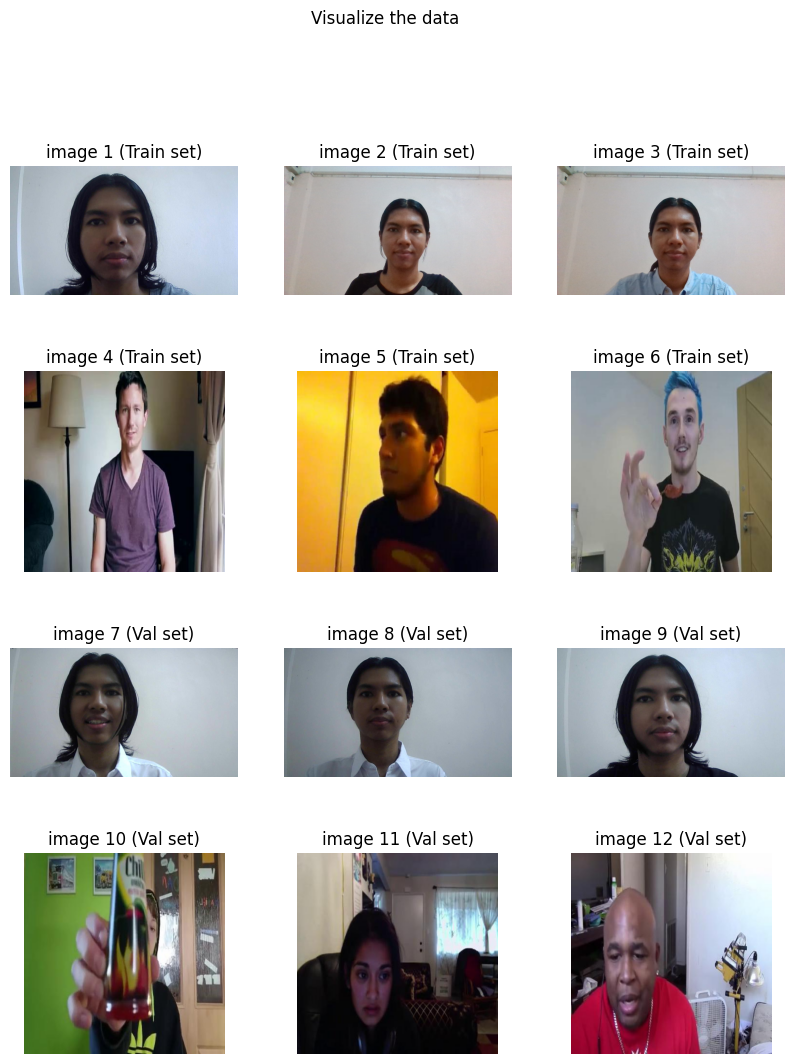

['00015.jpg', '00034.jpg', '00033.jpg', '211-10_png.rf.8c6aa58c07714d4fa9c6a7748b232631.jpg', '368-215_png.rf.c41008cb609c06d711ad36d813b1e2af.jpg', '172-50_png.rf.a766903e16a74d224c2e7a7acf183068.jpg', '00041.jpg', '00042.jpg', '00044.jpg', '207-140_png.rf.aeef1618fbacfc0856b19eb2cec4c966.jpg', '446-115_png.rf.afcdaff579739ea19d1bf80d4475f7a8.jpg', '181-255_png.rf.eae3cece1040b2772bf37707a9860720.jpg']


In [ ]:
rand_img_plot(train_path='./datasets/face_v2/train/images/', val_path='./datasets/face_v2/val/images/')

# 4.Prepare The Data

In [ ]:
!pwd

/content/drive/MyDrive/computer_vision/work_register/datasets/roboflow_face_dataset


In [ ]:
%cd /content/drive/MyDrive/computer_vision/work_register
!pwd

/content/drive/MyDrive/computer_vision/work_register


Convert coordinate of bounding box with COCO format to be YOLO format (since Supervisely, the platform used to annotate self-collected data, is only able to generate COCO format with no cost at the time developed this project)

In [ ]:
import json

def convert_bbox_coco2yolo(img_w, img_h, bbox):
    x_tl, y_tl, bbox_w, bbox_h = bbox

    x_c = x_tl + (bbox_w/2)
    y_c = y_tl + (bbox_h/2)

    # normalization
    x_c = x_c / img_w
    y_c = y_c / img_h
    bbox_w = bbox_w / img_w
    bbox_h = bbox_h / img_h

    return [x_c, y_c, bbox_w, bbox_h]

train_f = open('./datasets/face/956833_train/annotations/instances.json', 'r')
test_f = open('./datasets/face/956826_test/annotations/instances.json', 'r')
train_jf = json.load(train_f)
test_jf = json.load(test_f)

train_jf

{'info': {'description': '',
  'url': 'None',
  'version': '1.0',
  'year': 2024,
  'contributor': 'Supervisely',
  'date_created': '2024-07-02T11:35:55.824Z'},
 'licenses': [{'url': 'None', 'id': 0, 'name': 'None'}],
 'images': [{'license': 'None',
   'file_name': '08.jpg',
   'url': 'None',
   'height': 720,
   'width': 1280,
   'date_captured': '2024-07-02T11:36:02.222Z',
   'id': 14,
   'sly_id': 341260550},
  {'license': 'None',
   'file_name': '11.jpg',
   'url': 'None',
   'height': 720,
   'width': 1280,
   'date_captured': '2024-07-02T11:36:02.222Z',
   'id': 15,
   'sly_id': 341260551},
  {'license': 'None',
   'file_name': '06.jpg',
   'url': 'None',
   'height': 720,
   'width': 1280,
   'date_captured': '2024-07-02T11:36:02.222Z',
   'id': 16,
   'sly_id': 341260552},
  {'license': 'None',
   'file_name': '05.jpg',
   'url': 'None',
   'height': 720,
   'width': 1280,
   'date_captured': '2024-07-02T11:36:02.222Z',
   'id': 17,
   'sly_id': 341260553},
  {'license': 'None'

In [ ]:
train_jf['images'][0]

{'license': 'None',
 'file_name': '08.jpg',
 'url': 'None',
 'height': 720,
 'width': 1280,
 'date_captured': '2024-07-02T11:36:02.222Z',
 'id': 14,
 'sly_id': 341260550}

In [ ]:
train_jf['annotations'][0]

{'segmentation': [],
 'area': 249150.0,
 'iscrowd': 0,
 'image_id': 14,
 'bbox': [340.0, 50.0, 453.0, 550.0],
 'category_id': 2,
 'id': 14}

In [ ]:
train_imgs = train_jf['images']
train_anns = train_jf['annotations']
test_imgs = test_jf['images']
test_anns = test_jf['annotations']

train_bboxs, test_bboxs = [], []
for anns in (train_anns, test_anns):
  for ann in anns:
    for key in ann:
      if key == 'bbox':
        if anns == train_anns:
          train_bboxs.append(ann[key])
        elif anns == test_anns:
          test_bboxs.append(ann[key])

print('len(train_imgs) =', len(train_imgs))
train_imgs

len(train_imgs) = 37


[{'license': 'None',
  'file_name': '08.jpg',
  'url': 'None',
  'height': 720,
  'width': 1280,
  'date_captured': '2024-07-02T11:36:02.222Z',
  'id': 14,
  'sly_id': 341260550},
 {'license': 'None',
  'file_name': '11.jpg',
  'url': 'None',
  'height': 720,
  'width': 1280,
  'date_captured': '2024-07-02T11:36:02.222Z',
  'id': 15,
  'sly_id': 341260551},
 {'license': 'None',
  'file_name': '06.jpg',
  'url': 'None',
  'height': 720,
  'width': 1280,
  'date_captured': '2024-07-02T11:36:02.222Z',
  'id': 16,
  'sly_id': 341260552},
 {'license': 'None',
  'file_name': '05.jpg',
  'url': 'None',
  'height': 720,
  'width': 1280,
  'date_captured': '2024-07-02T11:36:02.222Z',
  'id': 17,
  'sly_id': 341260553},
 {'license': 'None',
  'file_name': '12.jpg',
  'url': 'None',
  'height': 720,
  'width': 1280,
  'date_captured': '2024-07-02T11:36:02.222Z',
  'id': 18,
  'sly_id': 341260554},
 {'license': 'None',
  'file_name': '03.jpg',
  'url': 'None',
  'height': 720,
  'width': 1280,
  '

In [ ]:
print('len(train_anns) =', len(train_anns))
train_anns

len(train_anns) = 37


[{'segmentation': [],
  'area': 249150.0,
  'iscrowd': 0,
  'image_id': 14,
  'bbox': [340.0, 50.0, 453.0, 550.0],
  'category_id': 2,
  'id': 14},
 {'segmentation': [],
  'area': 238420.0,
  'iscrowd': 0,
  'image_id': 15,
  'bbox': [318.0, 34.0, 455.0, 524.0],
  'category_id': 2,
  'id': 15},
 {'segmentation': [],
  'area': 356952.0,
  'iscrowd': 0,
  'image_id': 16,
  'bbox': [267.0, 9.0, 556.0, 642.0],
  'category_id': 2,
  'id': 16},
 {'segmentation': [],
  'area': 316308.0,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [234.0, 55.0, 516.0, 613.0],
  'category_id': 2,
  'id': 17},
 {'segmentation': [],
  'area': 258312.0,
  'iscrowd': 0,
  'image_id': 18,
  'bbox': [261.0, 41.0, 458.0, 564.0],
  'category_id': 2,
  'id': 18},
 {'segmentation': [],
  'area': 326895.0,
  'iscrowd': 0,
  'image_id': 19,
  'bbox': [284.0, 51.0, 555.0, 589.0],
  'category_id': 2,
  'id': 19},
 {'segmentation': [],
  'area': 186496.0,
  'iscrowd': 0,
  'image_id': 20,
  'bbox': [425.0, 46.0, 376.0, 496.0]

In [ ]:
print('len(train_bboxs) =', len(train_bboxs))
train_bboxs

len(train_bboxs) = 37


[[340.0, 50.0, 453.0, 550.0],
 [318.0, 34.0, 455.0, 524.0],
 [267.0, 9.0, 556.0, 642.0],
 [234.0, 55.0, 516.0, 613.0],
 [261.0, 41.0, 458.0, 564.0],
 [284.0, 51.0, 555.0, 589.0],
 [425.0, 46.0, 376.0, 496.0],
 [254.0, 43.0, 637.0, 676.0],
 [279.0, 69.0, 520.0, 585.0],
 [260.0, 35.0, 553.0, 617.0],
 [265.0, 35.0, 618.0, 633.0],
 [228.0, 40.0, 550.0, 649.0],
 [286.0, 17.0, 574.0, 659.0],
 [261.0, 29.0, 625.0, 690.0],
 [344.0, 16.0, 390.0, 488.0],
 [202.0, 0.0, 582.0, 664.0],
 [281.0, 28.0, 503.0, 462.0],
 [310.0, 62.0, 535.0, 592.0],
 [265.0, 14.0, 581.0, 641.0],
 [270.0, 36.0, 552.0, 581.0],
 [302.0, 40.0, 390.0, 498.0],
 [258.0, 0.0, 618.0, 689.0],
 [281.0, 44.0, 568.0, 605.0],
 [265.0, 101.0, 390.0, 502.0],
 [272.0, 102.0, 499.0, 522.0],
 [219.0, 0.0, 520.0, 667.0],
 [231.0, 0.0, 623.0, 668.0],
 [260.0, 6.0, 599.0, 657.0],
 [302.0, 53.0, 603.0, 666.0],
 [239.0, 20.0, 459.0, 563.0],
 [360.0, 10.0, 447.0, 528.0],
 [98.0, 22.0, 482.0, 536.0],
 [214.0, 506.0, 1180.0, 1522.0],
 [33.0, 250.

In [ ]:
print('len(test_bboxs) =', len(test_bboxs))
test_bboxs

len(test_bboxs) = 13


[[700.0, 338.0, 1820.0, 1810.0],
 [127.0, 0.0, 667.0, 659.0],
 [494.0, 147.0, 302.0, 448.0],
 [498.0, 115.0, 320.0, 443.0],
 [537.0, 189.0, 289.0, 376.0],
 [272.0, 24.0, 589.0, 655.0],
 [222.0, 14.0, 503.0, 567.0],
 [216.0, 0.0, 653.0, 674.0],
 [348.0, 16.0, 437.0, 532.0],
 [240.0, 16.0, 491.0, 627.0],
 [340.0, 36.0, 405.0, 494.0],
 [322.0, 16.0, 569.0, 689.0],
 [296.0, 16.0, 586.0, 641.0]]

In [ ]:
train_w_h_lst = [[img['width'], img['height']] for img in train_imgs]
test_w_h_lst = [[img['width'], img['height']] for img in test_imgs]

print(f'len(train_w_h_lst) = {len(train_w_h_lst)}')
print(f'len(test_w_h_lst) = {len(test_w_h_lst)}')

len(train_w_h_lst) = 37
len(test_w_h_lst) = 13


In [ ]:
yolo_train_bboxs = [convert_bbox_coco2yolo(train_w_h_lst[ind][0], train_w_h_lst[ind][1], train_bboxs[ind]) for ind in range(0, 37)]
yolo_test_bboxs = [convert_bbox_coco2yolo(test_w_h_lst[ind][0], test_w_h_lst[ind][1], test_bboxs[ind]) for ind in range(0, 13)]

for ind in range(0, 37):
  if train_anns[ind]['category_id'] == 1:
    yolo_class = 0 # For the class "Non-employee".

  elif train_anns[ind]['category_id'] == 2:
    yolo_class = 1 # For the class "Issara (Kao)".

  yolo_train_bboxs[ind].insert(0, yolo_class)

for ind in range(0, 13):
  if test_anns[ind]['category_id'] == 1:
    yolo_class = 0 # For the class "Non-employee".
  elif test_anns[ind]['category_id'] == 2:
    yolo_class = 1 # For the class "Issara (Kao)".

  yolo_test_bboxs[ind].insert(0, yolo_class)

print(f'len(yolo_train_bboxs) = {len(yolo_train_bboxs)}')
yolo_train_bboxs

len(yolo_train_bboxs) = 37


[[1, 0.442578125, 0.4513888888888889, 0.35390625, 0.7638888888888888],
 [1, 0.426171875, 0.4111111111111111, 0.35546875, 0.7277777777777777],
 [1, 0.42578125, 0.4583333333333333, 0.434375, 0.8916666666666667],
 [1, 0.384375, 0.5020833333333333, 0.403125, 0.8513888888888889],
 [1, 0.3828125, 0.4486111111111111, 0.3578125, 0.7833333333333333],
 [1, 0.438671875, 0.4798611111111111, 0.43359375, 0.8180555555555555],
 [1, 0.47890625, 0.4083333333333333, 0.29375, 0.6888888888888889],
 [1, 0.447265625, 0.5291666666666667, 0.49765625, 0.9388888888888889],
 [1, 0.42109375, 0.5020833333333333, 0.40625, 0.8125],
 [1, 0.419140625, 0.47708333333333336, 0.43203125, 0.8569444444444444],
 [1, 0.4484375, 0.48819444444444443, 0.4828125, 0.8791666666666667],
 [1, 0.39296875, 0.50625, 0.4296875, 0.9013888888888889],
 [1, 0.44765625, 0.48125, 0.4484375, 0.9152777777777777],
 [1, 0.448046875, 0.5194444444444445, 0.48828125, 0.9583333333333334],
 [1, 0.42109375, 0.3611111111111111, 0.3046875, 0.67777777777777

In [ ]:
print(f'len(yolo_test_bboxs) = {len(yolo_test_bboxs)}')
yolo_test_bboxs

len(yolo_test_bboxs) = 13


[[0,
  0.5270049099836334,
  0.42495726495726494,
  0.5957446808510638,
  0.6188034188034188],
 [0,
  0.5495226730310262,
  0.39461077844311376,
  0.7959427207637232,
  0.7892215568862275],
 [1, 0.50390625, 0.5152777777777777, 0.2359375, 0.6222222222222222],
 [1, 0.5140625, 0.4673611111111111, 0.25, 0.6152777777777778],
 [1, 0.532421875, 0.5236111111111111, 0.22578125, 0.5222222222222223],
 [1, 0.442578125, 0.48819444444444443, 0.46015625, 0.9097222222222222],
 [1, 0.369921875, 0.4131944444444444, 0.39296875, 0.7875],
 [1, 0.423828125, 0.46805555555555556, 0.51015625, 0.9361111111111111],
 [1, 0.442578125, 0.39166666666666666, 0.34140625, 0.7388888888888889],
 [1, 0.379296875, 0.4576388888888889, 0.38359375, 0.8708333333333333],
 [1, 0.423828125, 0.39305555555555555, 0.31640625, 0.6861111111111111],
 [1, 0.473828125, 0.5006944444444444, 0.44453125, 0.9569444444444445],
 [1, 0.46015625, 0.4673611111111111, 0.4578125, 0.8902777777777777]]

In [ ]:
train_imgs[0]['file_name']

'08.jpg'

In [ ]:
# train
for ind in range(0, 37):
  ann_file_name = train_imgs[ind]['file_name'][:2] # For example, the variable "ann_file_name" would be "01" for the file "01.jpg"
  ann_file_name = ann_file_name.zfill(5)  # For example, the variable "ann_file_name" would change from "01" to "00001"
  ann_file_path = f'datasets/face/train/labels/{ann_file_name}.txt'
  with open(ann_file_path, 'w') as f:
    f.write(f'{yolo_train_bboxs[ind][0]} {yolo_train_bboxs[ind][1]} {yolo_train_bboxs[ind][2]} {yolo_train_bboxs[ind][3]} {yolo_train_bboxs[ind][4]}')

# test
for ind in range(0, 13):
  ann_file_name = test_imgs[ind]['file_name'][:2] # For example, the variable "ann_file_name" would be "00001" for the file "00001.jpg"
  ann_file_name = ann_file_name.zfill(5)  # For example, the variable "ann_file_name" would change from "01" to "00001"
  ann_file_path = f'datasets/face/test/labels/{ann_file_name}.txt'
  with open(ann_file_path, 'w') as f:
    f.write(f'{yolo_test_bboxs[ind][0]} {yolo_test_bboxs[ind][1]} {yolo_test_bboxs[ind][2]} {yolo_test_bboxs[ind][3]} {yolo_test_bboxs[ind][4]}')

Copy 37 images and labels from the train set of the self-collected dataset to the train set of new dataset named "face_v2"

In [ ]:
!mkdir datasets/face_v2
!mkdir datasets/face_v2/train
!mkdir datasets/face_v2/train/images
!mkdir datasets/face_v2/train/labels

In [ ]:
!cp datasets/face/train/images/* datasets/face_v2/train/images

In [ ]:
!cp datasets/face/train/labels/* datasets/face_v2/train/labels

Copy 6711 images 6711 labels from the train set of Roboflow dataset to the train set of new dataset named "face_v2"

In [ ]:
!ls -1 datasets/roboflow_face_dataset/train/images | wc -l

6711


In [ ]:
!ls -1 datasets/roboflow_face_dataset/train/labels | wc -l

6711


In [ ]:
!cp datasets/roboflow_face_dataset/train/images/* datasets/face_v2/train/images

In [ ]:
!cp datasets/roboflow_face_dataset/train/labels/* datasets/face_v2/train/labels

In [ ]:
!ls -1 datasets/face_v2/train/images | wc -l

6748


In [ ]:
!ls -1 datasets/face_v2/train/labels | wc -l

6748


Copy the first 956 images and labels from the validation set of Roboflow dataset to the train set of new dataset named "face_v2"

In [ ]:
!ls datasets/roboflow_face_dataset/valid/images | head -n 10

113-120_png.rf.2ee12add1ab5ba237db13f821756b35d.jpg
113-135_png.rf.0e799105e7de6ea408b7b3eb57602f15.jpg
113-150_png.rf.8357be77a53609092c1d86f1b853a7ef.jpg
113-165_png.rf.466a95cdeac0d0b566369ecbaaedf06e.jpg
113-180_png.rf.41d417ac3452a9ed863dfdd20b866379.jpg
113-195_png.rf.2b2e0abce8e86a5c93f2fbe2085beffc.jpg
113-200_png.rf.31a88b484338d9996b7c19a502f19bbd.jpg
113-245_png.rf.5fecb07e06105071dacb2b6abc565d53.jpg
113-250_png.rf.e08415866499305b20a81a3044ac2ffd.jpg
113-275_png.rf.af8c8418658d3ac863aa083c6fff2556.jpg


In [ ]:
!find datasets/roboflow_face_dataset/valid/images -maxdepth 1 -type f | sort | head -956 | xargs cp -t datasets/face_v2/train/images

In [ ]:
!find datasets/roboflow_face_dataset/valid/labels -maxdepth 1 -type f | sort | head -956 | xargs cp -t datasets/face_v2/train/labels

The two following cells should expectedly output 7704

In [ ]:
!ls -1 ./datasets/face_v2/train/images | wc -l

7704


In [ ]:
!ls -1 ./datasets/face_v2/train/labels | wc -l

7704


Copy 13 images and labels from the test set of the self-collected dataset to the validation set of new dataset named "face_v2"

In [ ]:
!mkdir ./datasets/face_v2/val
!mkdir ./datasets/face_v2/val/images
!mkdir ./datasets/face_v2/val/labels

In [ ]:
!cp datasets/face/test/images/* datasets/face_v2/val/images

In [ ]:
!cp datasets/face/test/labels/* datasets/face_v2/val/labels

Copy the last 958 images and labels from the validation set of Roboflow dataset to the validation set of new dataset named "face_v2"

In [ ]:
!find datasets/roboflow_face_dataset/valid/images -maxdepth 1 -type f  | sort | tail -958 | xargs cp -t datasets/face_v2/val/images

In [ ]:
!find datasets/roboflow_face_dataset/valid/labels -maxdepth 1 -type f  | sort | tail -958 | xargs cp -t datasets/face_v2/val/labels

Copy 955 images and labels from the test set of Roboflow dataset to the validation set of new dataset named "face_v2"

In [ ]:
!cp datasets/roboflow_face_dataset/test/images/* datasets/face_v2/val/images

In [ ]:
!cp datasets/roboflow_face_dataset/test/labels/* datasets/face_v2/val/labels

The two following cells should expectedly output 1926

In [ ]:
!ls -1 datasets/face_v2/val/images | wc -l

1926


In [ ]:
!ls -1 datasets/face_v2/val/labels | wc -l

1926


# 5.Train YOLO model

In [ ]:
from ultralytics import YOLO
from ultralytics import settings

settings.update({"wandb": False})

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Train pre-trained YOLOv8n model on the custom dataset (self-collected dataset + Roboflow dataset) with 50 epochs and freezing backbone layers

In [ ]:
pt_model = YOLO(model='yolov8n.pt')

result = pt_model.train(data='face_v2_dataset.yaml', epochs=50, freeze=5, batch=32) # train2

New https://pypi.org/project/ultralytics/8.3.138 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=face_v2_dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=5, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

100%|██████████| 755k/755k [00:00<00:00, 121MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,238 parameters, 3,011,222 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.0.conv.weight'
Freezing layer 'model.0.bn.weight'
Freezing layer 'model.0.bn.bias'
Freezing layer 'model.1.conv.weight'
Freezing layer 'model.1.bn.weight'
Freezing layer 'model.1.bn.bias'
Freezing layer 'model.2.cv1.conv.weight'
Freezing layer 'model.2.cv1.bn.weight'
Freezing layer 'model.2.cv1.bn.bias'
Freezing layer 'model.2.cv2.conv.weight'
Freezing layer 'model.2.cv2.bn.weight'
Freezing layer 'model.2.cv2.bn.bias'
Freezing layer 'model.2.m.0.cv1.conv.weight'
Freezing layer 'model.2.m.0.cv1.bn.weight'
Freezing layer 'model.2.m.0.cv1.bn.bias'
Freezing layer 'model.2.m.0.cv2.conv.weight'
Freezing layer 'model.2.m.0.cv2.bn.weight'
Freezing layer 'model.2.m.0.cv2.bn.bias'
Freezing layer 'model.3.conv.weight'
Freezing layer 'model.3.bn.weight'
Freezing layer 'model.3.bn.bias'
Freezing layer 'model.4.cv1.conv.weight'
Freezing layer 'mode

train: Scanning /content/drive/MyDrive/computer_vision/work_register/datasets/face_v2/train/labels... 7704 images, 346 backgrounds, 0 corrupt: 100%|██████████| 7704/7704 [12:03<00:00, 10.65it/s]


train: New cache created: /content/drive/MyDrive/computer_vision/work_register/datasets/face_v2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.0±0.0 MB/s, size: 18.3 KB)


val: Scanning /content/drive/MyDrive/computer_vision/work_register/datasets/face_v2/val/labels... 1926 images, 65 backgrounds, 0 corrupt: 100%|██████████| 1926/1926 [02:43<00:00, 11.80it/s]


val: New cache created: /content/drive/MyDrive/computer_vision/work_register/datasets/face_v2/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.42G      1.524      1.812      1.471         44        640: 100%|██████████| 241/241 [00:36<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.10it/s]


                   all       1926       1861       0.94      0.452      0.533      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.21G       1.44     0.9666      1.376         42        640: 100%|██████████| 241/241 [00:33<00:00,  7.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.54it/s]

                   all       1926       1861      0.882      0.942      0.963      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.22G      1.394     0.8308      1.344         43        640: 100%|██████████| 241/241 [00:31<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all       1926       1861      0.759      0.955      0.948      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.23G      1.377     0.7909      1.339         36        640: 100%|██████████| 241/241 [00:32<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.907      0.938      0.971      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.25G      1.334     0.7429      1.319         46        640: 100%|██████████| 241/241 [00:32<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all       1926       1861      0.937      0.958       0.98      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.27G      1.298     0.7015      1.302         52        640: 100%|██████████| 241/241 [00:31<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.58it/s]

                   all       1926       1861       0.78      0.973       0.94      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.28G      1.278     0.6911       1.29         44        640: 100%|██████████| 241/241 [00:32<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.54it/s]

                   all       1926       1861      0.964      0.973      0.982      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50       3.3G      1.254     0.6606      1.282         39        640: 100%|██████████| 241/241 [00:32<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.63it/s]

                   all       1926       1861      0.605      0.967       0.77      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.31G      1.241     0.6505      1.275         34        640: 100%|██████████| 241/241 [00:32<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.65it/s]

                   all       1926       1861      0.964       0.98      0.981       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.33G       1.23     0.6449       1.27         42        640: 100%|██████████| 241/241 [00:32<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.60it/s]

                   all       1926       1861      0.951      0.942      0.983      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.35G      1.211     0.6245      1.255         40        640: 100%|██████████| 241/241 [00:32<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.952      0.977      0.982      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.37G       1.21     0.6215       1.26         37        640: 100%|██████████| 241/241 [00:32<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.54it/s]

                   all       1926       1861      0.962      0.982      0.982      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.38G       1.19     0.6116      1.249         34        640: 100%|██████████| 241/241 [00:32<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all       1926       1861      0.974      0.978      0.988      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.4G      1.189     0.6067       1.25         38        640: 100%|██████████| 241/241 [00:32<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.50it/s]

                   all       1926       1861      0.977      0.975      0.986      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.42G      1.173     0.5893      1.241         49        640: 100%|██████████| 241/241 [00:31<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all       1926       1861      0.948      0.972      0.986      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.43G      1.165     0.5794      1.231         33        640: 100%|██████████| 241/241 [00:32<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.59it/s]

                   all       1926       1861      0.975      0.967      0.986      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.45G      1.158     0.5825      1.235         51        640: 100%|██████████| 241/241 [00:31<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.61it/s]

                   all       1926       1861      0.973      0.978      0.988      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.47G      1.138     0.5692      1.219         43        640: 100%|██████████| 241/241 [00:32<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.54it/s]

                   all       1926       1861      0.968      0.973      0.989      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.48G      1.139     0.5683      1.217         34        640: 100%|██████████| 241/241 [00:31<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.58it/s]

                   all       1926       1861      0.969      0.979      0.988      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.5G      1.118     0.5599      1.214         36        640: 100%|██████████| 241/241 [00:31<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.50it/s]

                   all       1926       1861      0.973      0.976      0.988      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.52G      1.124     0.5665      1.213         38        640: 100%|██████████| 241/241 [00:31<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.60it/s]

                   all       1926       1861       0.97      0.979      0.987       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.53G      1.111     0.5485      1.208         50        640: 100%|██████████| 241/241 [00:31<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.54it/s]

                   all       1926       1861      0.972      0.977      0.988      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.55G      1.105     0.5467      1.206         42        640: 100%|██████████| 241/241 [00:32<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.968      0.978      0.988      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.57G      1.109     0.5447      1.198         43        640: 100%|██████████| 241/241 [00:32<00:00,  7.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.61it/s]

                   all       1926       1861      0.977      0.974      0.988      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.58G      1.099     0.5452      1.204         34        640: 100%|██████████| 241/241 [00:31<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.958      0.974       0.99      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       3.6G      1.088     0.5349      1.194         36        640: 100%|██████████| 241/241 [00:31<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.54it/s]

                   all       1926       1861      0.976      0.974      0.991      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.62G      1.072     0.5262      1.185         37        640: 100%|██████████| 241/241 [00:31<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all       1926       1861      0.964      0.982      0.989      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.63G      1.082     0.5325      1.191         41        640: 100%|██████████| 241/241 [00:31<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.58it/s]

                   all       1926       1861      0.974      0.976      0.989      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.65G      1.067     0.5172      1.183         42        640: 100%|██████████| 241/241 [00:31<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all       1926       1861      0.967       0.98      0.989      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.67G      1.066     0.5184      1.179         41        640: 100%|██████████| 241/241 [00:31<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.59it/s]

                   all       1926       1861      0.969       0.98       0.99      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.68G      1.049     0.5124       1.17         30        640: 100%|██████████| 241/241 [00:31<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.52it/s]

                   all       1926       1861      0.974      0.979       0.99      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.7G      1.038     0.5033      1.168         45        640: 100%|██████████| 241/241 [00:31<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.971      0.979      0.991      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.72G      1.043     0.5088      1.171         44        640: 100%|██████████| 241/241 [00:31<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all       1926       1861       0.97      0.976       0.99      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.73G       1.05     0.5088       1.18         46        640: 100%|██████████| 241/241 [00:31<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.50it/s]

                   all       1926       1861      0.972      0.977       0.99       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.75G       1.02     0.4948      1.164         39        640: 100%|██████████| 241/241 [00:32<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.65it/s]

                   all       1926       1861      0.968      0.979       0.99      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.77G      1.031     0.4951      1.167         51        640: 100%|██████████| 241/241 [00:31<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.52it/s]

                   all       1926       1861      0.973      0.978       0.99      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.79G      1.016     0.4861      1.157         45        640: 100%|██████████| 241/241 [00:31<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.52it/s]

                   all       1926       1861      0.976      0.976      0.991       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.8G      1.004     0.4833      1.146         43        640: 100%|██████████| 241/241 [00:31<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.49it/s]

                   all       1926       1861      0.968       0.98      0.991      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.82G      1.009     0.4856      1.156         37        640: 100%|██████████| 241/241 [00:31<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.56it/s]

                   all       1926       1861      0.972      0.979       0.99       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.83G      1.002      0.481      1.149         32        640: 100%|██████████| 241/241 [00:31<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.977      0.976      0.991      0.772


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.85G     0.9713      0.371      1.166         23        640: 100%|██████████| 241/241 [00:32<00:00,  7.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.56it/s]

                   all       1926       1861      0.976      0.978      0.992      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.87G     0.9559     0.3628      1.158         22        640: 100%|██████████| 241/241 [00:31<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.50it/s]

                   all       1926       1861      0.974      0.978      0.993      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.88G     0.9452     0.3564      1.151         22        640: 100%|██████████| 241/241 [00:31<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.972       0.98      0.993      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.91G     0.9367     0.3548      1.148         23        640: 100%|██████████| 241/241 [00:31<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.974      0.981      0.993       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.92G     0.9311     0.3503      1.144         23        640: 100%|██████████| 241/241 [00:31<00:00,  7.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.55it/s]

                   all       1926       1861      0.973       0.98      0.993      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.94G     0.9162      0.347      1.136         23        640: 100%|██████████| 241/241 [00:31<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.53it/s]

                   all       1926       1861      0.971      0.979      0.992      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.95G     0.9115     0.3429      1.132         23        640: 100%|██████████| 241/241 [00:31<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.63it/s]

                   all       1926       1861      0.972       0.98      0.992      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.97G     0.9056     0.3366      1.128         22        640: 100%|██████████| 241/241 [00:31<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.60it/s]

                   all       1926       1861      0.975      0.979      0.993      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.99G     0.8931     0.3354      1.122         22        640: 100%|██████████| 241/241 [00:31<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.56it/s]

                   all       1926       1861      0.972      0.981      0.993      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.01G       0.89     0.3323      1.128         24        640: 100%|██████████| 241/241 [00:31<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:08<00:00,  3.61it/s]

                   all       1926       1861      0.975       0.98      0.993      0.805



50 epochs completed in 0.570 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:09<00:00,  3.16it/s]


                   all       1926       1861      0.975       0.98      0.993      0.804
          Non-employee       1850       1850      0.984      0.959       0.99      0.711
          Issara (Kao)         11         11      0.966          1      0.995      0.897
Speed: 0.2ms preprocess, 1.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


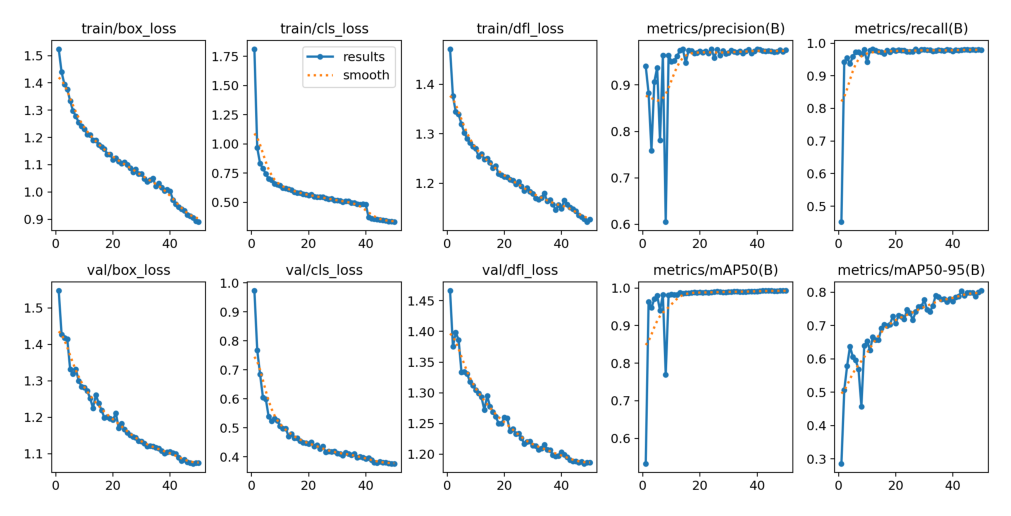

In [11]:
learning_curve = Image.open('./runs/detect/train/results.png')
plt.figure(figsize=(12.8, 8.16))
plt.imshow(learning_curve)
plt.axis('off')
plt.show()

Visualize predictions from trained model

In [53]:
def imgs_plot(preds):
  row_num = 2
  col_num = 3

  i = 0
  fig, axs = plt.subplots(row_num, col_num, figsize=(6.4*2, 4.8*2))
  for row in range(0, row_num):
    for col in range(0, col_num):

      axs[row, col].imshow(preds[i].plot()[:, :, ::-1])
      axs[row, col].axis('off')
      i += 1

  fig.suptitle('Predictoins from trained model')
  plt.show()

In [37]:
zeroClass_img_names = sorted(listdir('./datasets/face_v2/val/images/'))[8: ] # zeroClass_img_names is in type of list.
oneClass_img_names = sorted(listdir('./datasets/face_v2/val/images/'))[0: 8] # oneClass_img_names is in type of list.

sample_img_name = sample(zeroClass_img_names, 3) + sample(oneClass_img_names, 3)
sample_img_paths = ['./datasets/face_v2/val/images/' + img_name  for img_name in sample_img_name]

preds = pt_model(sample_img_paths)


0: 640x640 1 Non-employee, 5.2ms
1: 640x640 1 Non-employee, 5.2ms
2: 640x640 1 Non-employee, 5.2ms
3: 640x640 1 Issara (Kao), 5.2ms
4: 640x640 1 Issara (Kao), 5.2ms
5: 640x640 1 Issara (Kao), 5.2ms
Speed: 2.6ms preprocess, 5.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


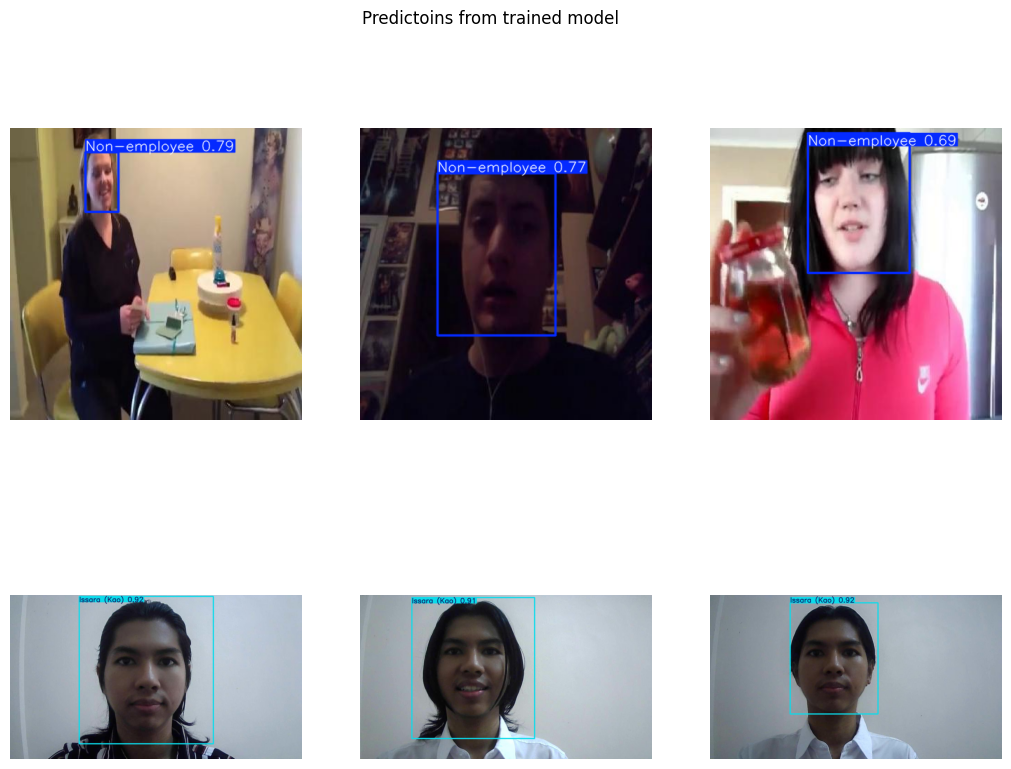

In [54]:
imgs_plot(preds)

# 6.Export to OpenVINO

In [ ]:
from ultralytics import YOLO
from ultralytics import settings

settings.update({"wandb": False})

model = YOLO('./runs/detect/train/weights/best.pt')

model.export(format="openvino")  # creates 'yolov8n_openvino_model/'

Ultralytics 8.3.114 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 224.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.5s, installed 1 package: ['openvino>=2024.0.0']
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with openvino 2025.1.0-18503-6fec06580ab-releases/2025/1...
OpenVINO: export success ✅ 8.3s, saved as 'runs/detect/train/weights/best_openvino_model/' (11.8 MB)

Export complete (10.0s)
Results saved to /content/drive/MyDrive/computer_vision/work_register/runs/detect/train/weights
Predict:         yolo predict task=detect

'runs/detect/train/weights/best_openvino_model'

In [ ]:
# Load the exported OpenVINO model
ov_model = YOLO("./runs/detect/train/weights/best_openvino_model/")

# Run inference
results = ov_model("https://ultralytics.com/images/bus.jpg")

# Run inference with specified device, available devices: ["intel:gpu", "intel:npu", "intel:cpu"]
# results = ov_model("https://ultralytics.com/images/bus.jpg", device="intel:gpu")

Loading runs/detect/train/weights/best_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...



100%|██████████| 134k/134k [00:00<00:00, 41.3MB/s]


image 1/1 /content/drive/MyDrive/computer_vision/work_register/bus.jpg: 640x640 (no detections), 26.3ms
Speed: 14.1ms preprocess, 26.3ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 640)
